# Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,cross_validate,GridSearchCV

In [2]:
data = pd.read_csv('diabetes.csv')

In [3]:
data

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,1.8912,False
764,2,122,70,27,0,36.8,0.340,27,1.0638,False
765,5,121,72,23,112,26.2,0.245,30,0.9062,False
766,1,126,60,0,0,30.1,0.349,47,0.0000,True


# Feature Engineering and Exploratory Data Analysis

In [4]:
data['diabetes'] = data['diabetes'].apply(lambda x:1 if x==True else 0)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num_preg      768 non-null    int64  
 1   glucose_conc  768 non-null    int64  
 2   diastolic_bp  768 non-null    int64  
 3   thickness     768 non-null    int64  
 4   insulin       768 non-null    int64  
 5   bmi           768 non-null    float64
 6   diab_pred     768 non-null    float64
 7   age           768 non-null    int64  
 8   skin          768 non-null    float64
 9   diabetes      768 non-null    int64  
dtypes: float64(3), int64(7)
memory usage: 60.1 KB


In [6]:
data.shape

(768, 10)

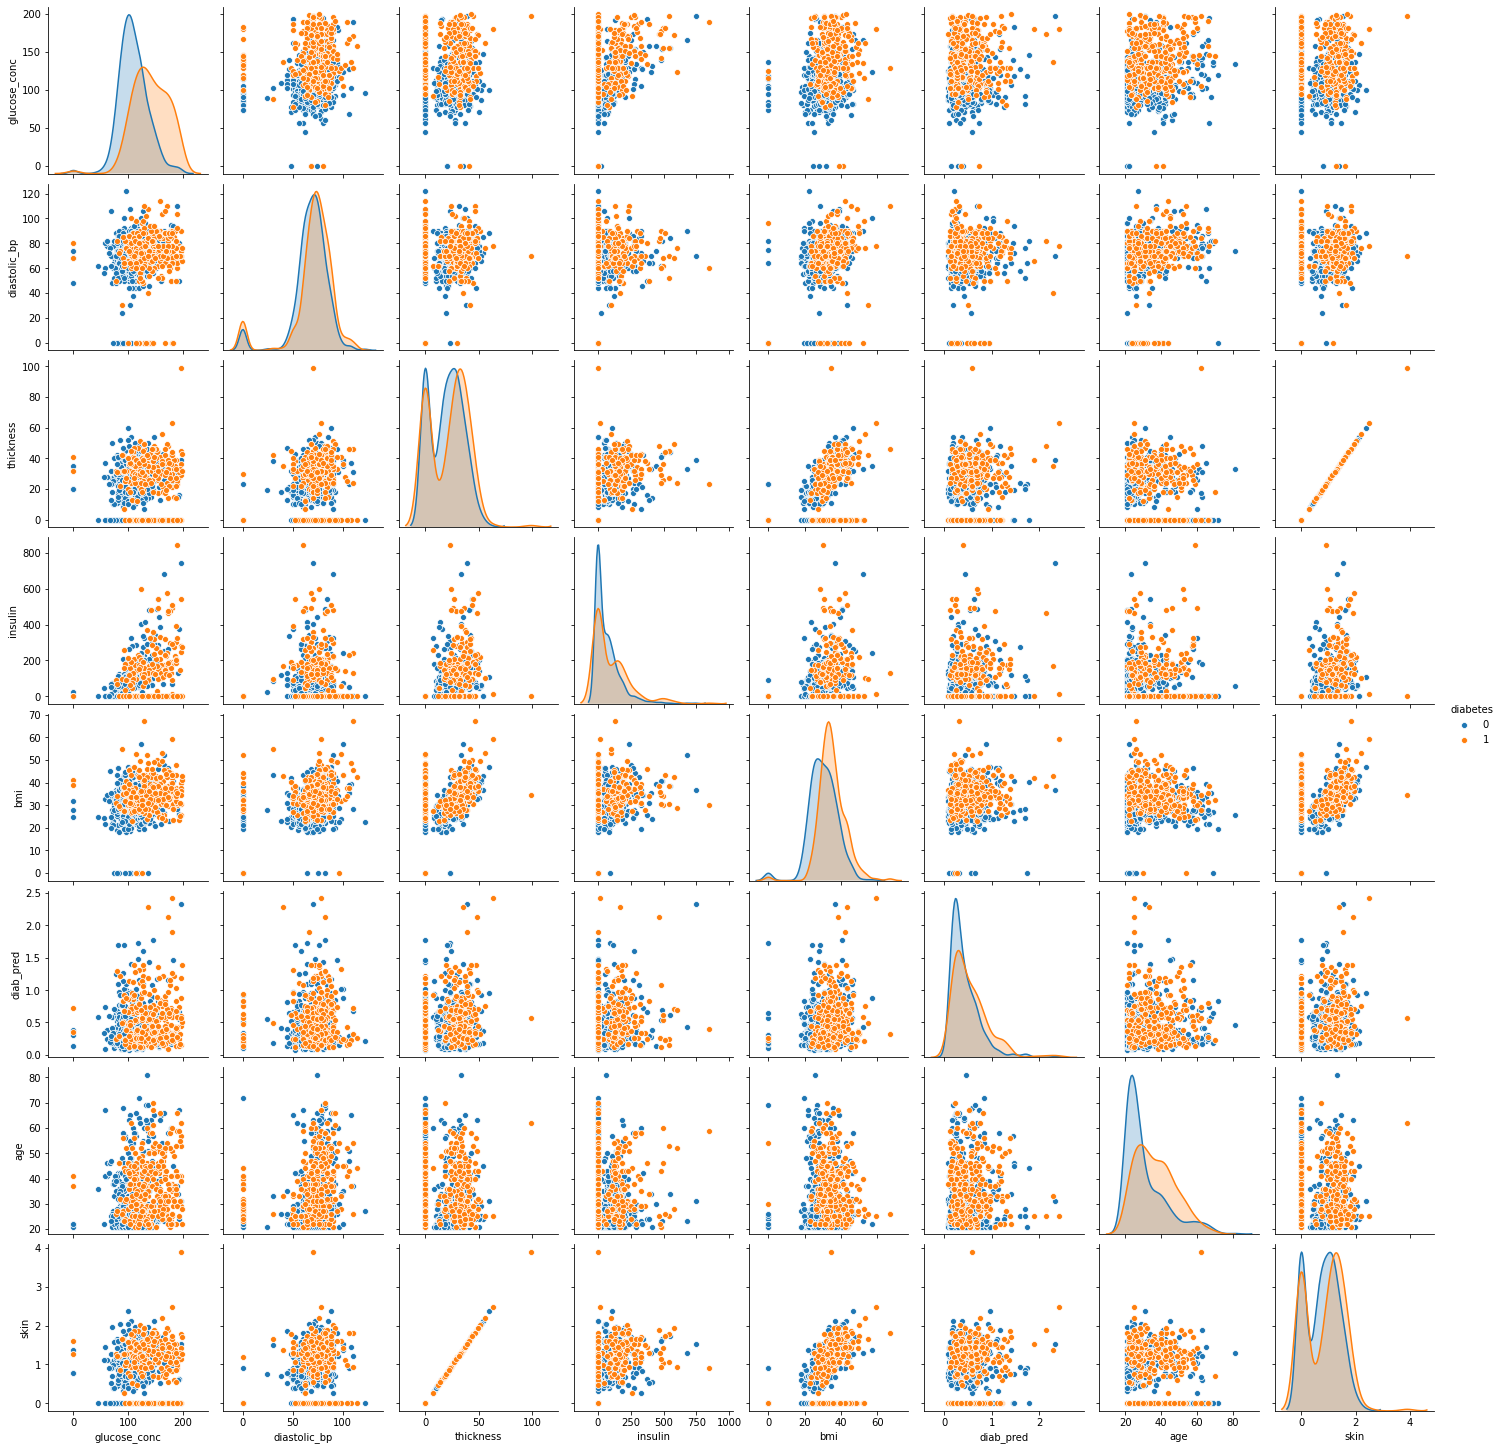

In [7]:
sns.pairplot(data, hue='diabetes',vars = data.columns[1:-1])

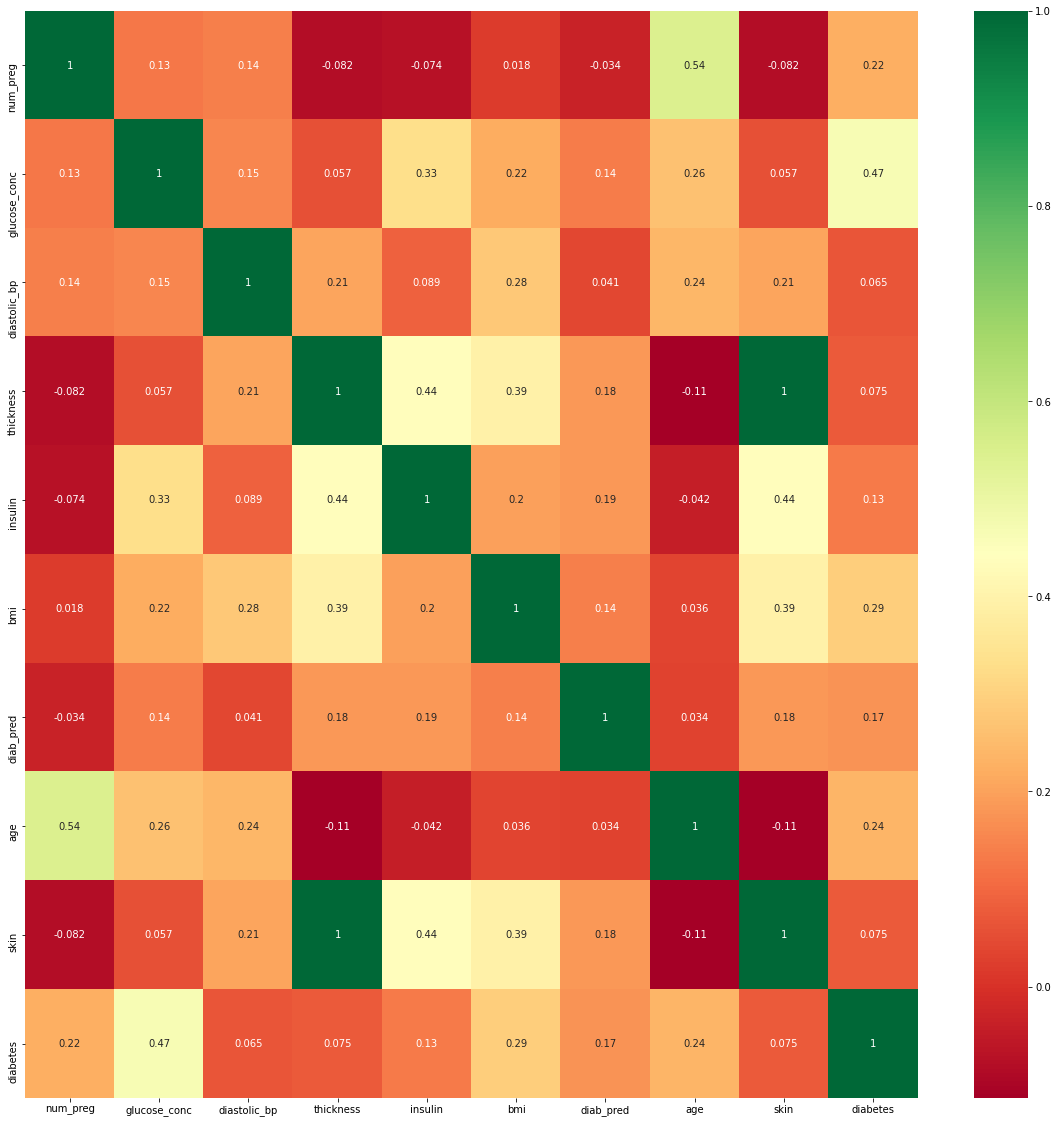

In [8]:
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

<AxesSubplot:xlabel='diabetes', ylabel='count'>

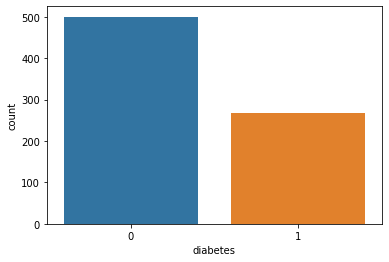

In [9]:
sns.countplot(data['diabetes'])   

In [10]:
data.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


In [11]:
print("total number of rows : {0}".format(len(data)))
print("number of rows missing glucose_conc: {0}".format(len(data.loc[data['glucose_conc'] == 0])))
print("number of rows missing diastolic_bp: {0}".format(len(data.loc[data['diastolic_bp'] == 0])))
print("number of rows missing insulin: {0}".format(len(data.loc[data['insulin'] == 0])))
print("number of rows missing bmi: {0}".format(len(data.loc[data['bmi'] == 0])))
print("number of rows missing diab_pred: {0}".format(len(data.loc[data['diab_pred'] == 0])))
print("number of rows missing age: {0}".format(len(data.loc[data['age'] == 0])))
print("number of rows missing skin: {0}".format(len(data.loc[data['skin'] == 0])))

total number of rows : 768
number of rows missing glucose_conc: 5
number of rows missing diastolic_bp: 35
number of rows missing insulin: 374
number of rows missing bmi: 11
number of rows missing diab_pred: 0
number of rows missing age: 0
number of rows missing skin: 227


In [12]:
na_columns = ['glucose_conc','thickness','insulin','bmi','diastolic_bp']
data[na_columns] = data[na_columns].replace(0,np.nan)

In [13]:
df = data.copy()

for column in ['glucose_conc','thickness','insulin']:
    median_0 = data[column][data['diabetes']==0].median()
    median_1 = data[column][data['diabetes']==1].median()
    
    df[column][df['diabetes']==0] = data[column][df['diabetes']==0].fillna(median_0)
    df[column][df['diabetes']==1] = data[column][df['diabetes']==1].fillna(median_1)

F:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
F:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
F:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
F:\Anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a 

In [14]:
df

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1.3790,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,1.1426,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,0.0000,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0.9062,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1.3790,1
...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,1.8912,0
764,2,122.0,70.0,27.0,102.5,36.8,0.340,27,1.0638,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0.9062,0
766,1,126.0,60.0,32.0,169.5,30.1,0.349,47,0.0000,1


In [15]:
df.diastolic_bp.fillna(df.diastolic_bp.median(),inplace=True)
df.bmi.fillna(df.bmi.median(),inplace=True)

In [16]:
X = df.drop('diabetes',axis=1)
X

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1.3790
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,1.1426
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,0.0000
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0.9062
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1.3790
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,1.8912
764,2,122.0,70.0,27.0,102.5,36.8,0.340,27,1.0638
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0.9062
766,1,126.0,60.0,32.0,169.5,30.1,0.349,47,0.0000


In [17]:
y = df.diabetes
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: diabetes, Length: 768, dtype: int64

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

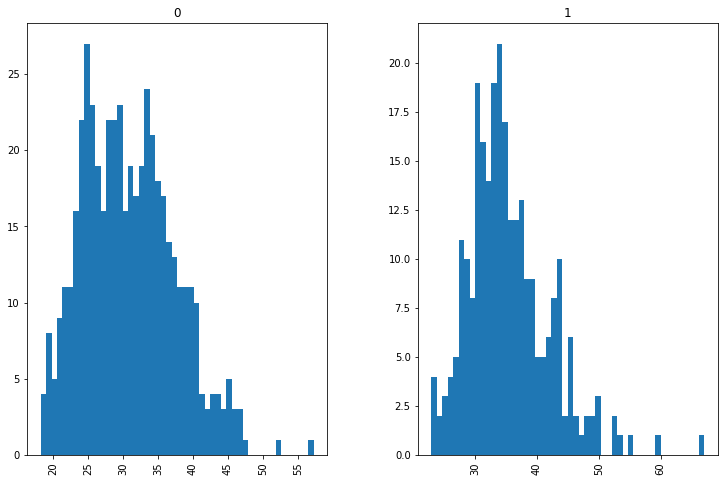

In [18]:
data.hist(column='bmi',bins=50,by='diabetes',figsize=(12,8))

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

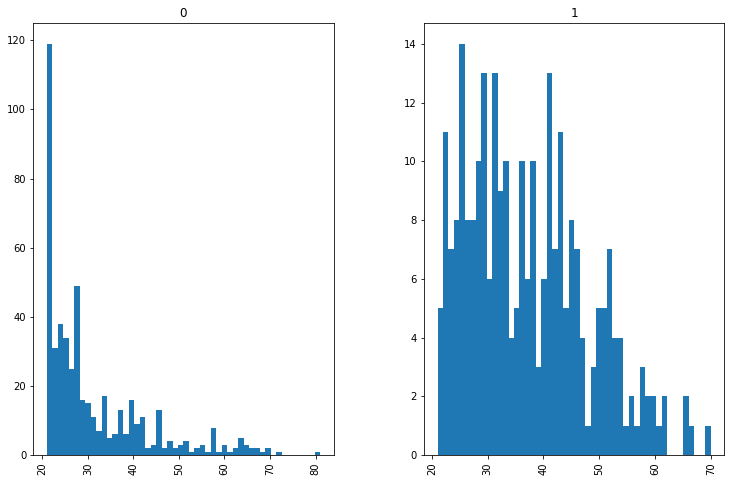

In [19]:
data.hist(column='age',bins=50,by='diabetes',figsize=(12,8))

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

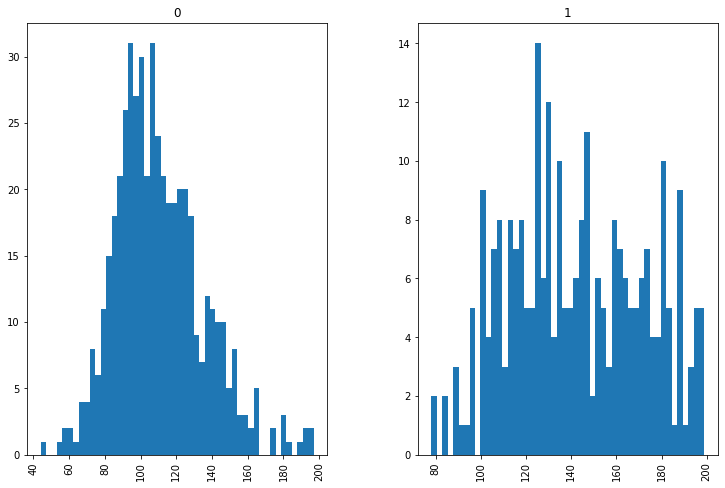

In [20]:
data.hist(column='glucose_conc',bins=50,by='diabetes',figsize=(12,8))

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

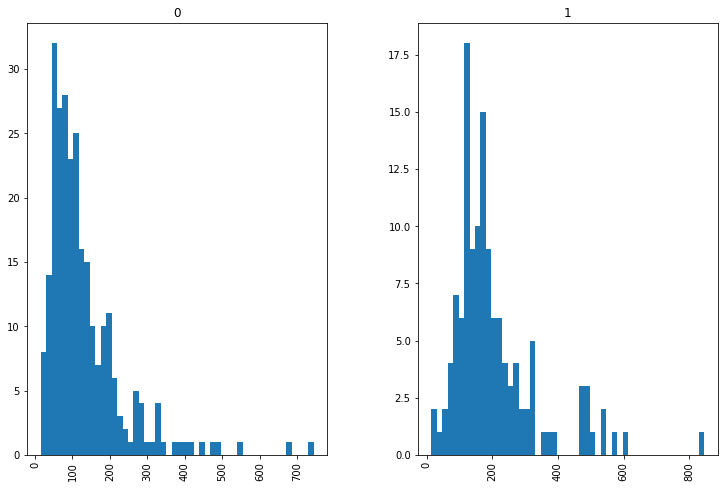

In [21]:
data.hist(column='insulin',bins=50,by='diabetes',figsize=(12,8))

# Creating metrics for evaluations

In [22]:
from sklearn import metrics
f1 = metrics.make_scorer(metrics.f1_score)
accuracy = metrics.make_scorer(metrics.accuracy_score)
precision = metrics.make_scorer(metrics.precision_score)
recall = metrics.make_scorer(metrics.recall_score)
auc = metrics.make_scorer(metrics.roc_auc_score)

In [23]:
scoring = {
    "accuracy":accuracy,
    "precision":precision,
    "recall": recall,
    "f1":f1,
}

In [24]:
def printResults(cv):
    print("Accuracy  {:.3f} ({:.3f})".format(cv["test_accuracy"].mean(), cv["test_accuracy"].std()))
    print("Precision {:.3f} ({:.3f})".format(cv["test_precision"].mean(), cv["test_precision"].std()))
    print("Recall    {:.3f} ({:.3f})".format(cv["test_recall"].mean(), cv["test_recall"].std()))
    print("F1        {:.3f} ({:.3f})".format(cv["test_f1"].mean(), cv["test_f1"].std()))

# Creating our ML Model

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [26]:
gbc = GradientBoostingClassifier()

In [27]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [28]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [29]:
y_pred = gbc.predict(X_test)

In [30]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       124
           1       0.85      0.84      0.84        68

    accuracy                           0.89       192
   macro avg       0.88      0.88      0.88       192
weighted avg       0.89      0.89      0.89       192



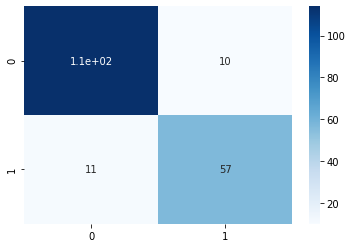

In [31]:
cm = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues");

In [32]:
cv_gbc = cross_validate(gbc, X, y, scoring=scoring, cv=5)

In [33]:
printResults(cv_gbc)

Accuracy  0.888 (0.016)
Precision 0.868 (0.031)
Recall    0.802 (0.029)
F1        0.833 (0.023)


# Tuning our ML Model

In [34]:
params = {
    'loss': ['deviance','exponential'],
    'learning_rate': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
    'n_estimators': [100,200,300,400,500,600,700,800,800,1000],
}
gs = GridSearchCV(estimator = gbc,param_grid=params,cv=5)

In [35]:
gs.fit(X,y)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7,
                                           0.8, 0.9, 1.0],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 200, 300, 400, 500, 600, 700,
                                          800, 800, 1000]})

In [36]:
gs.best_score_

0.8932773109243698

In [37]:
gs.best_params_

{'learning_rate': 0.1, 'loss': 'deviance', 'n_estimators': 400}

In [38]:
 gbc_best = GradientBoostingClassifier(learning_rate=0.1,loss='deviance',n_estimators=400)

In [39]:
gbc_best.fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=400)

In [40]:
y_pred = gbc_best.predict(X_test)

In [41]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92       124
           1       0.89      0.79      0.84        68

    accuracy                           0.89       192
   macro avg       0.89      0.87      0.88       192
weighted avg       0.89      0.89      0.89       192



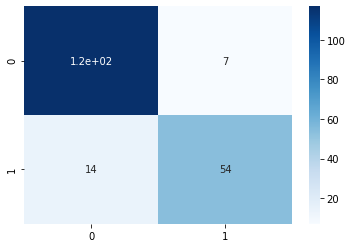

In [42]:
cm = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues");

In [43]:
cv_gbc_best = cross_validate(gbc_best, X, y, cv=5, scoring=scoring)

In [44]:
printResults(cv_gbc_best)

Accuracy  0.892 (0.021)
Precision 0.882 (0.038)
Recall    0.799 (0.038)
F1        0.838 (0.030)


In [45]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(gbc_best, X, y,cv = 10)
#cv is the number of folds you want your training set to split in

In [46]:
import pickle

filename = 'diabetes-model.pkl'
pickle.dump(gbc_best,open(filename,'wb'))